In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
file = 'demo_walk_1'
df = pd.read_csv(f'demo_data/{file}.csv')

In [23]:
leg_cols = ['hip', 'knee', 'ankle', 'foot']
#append left_ and right_ to each column name
left_leg_cols = ['left_' + col for col in leg_cols]
right_leg_cols = ['right_' + col for col in leg_cols]

leg_cols = left_leg_cols + right_leg_cols 

#append x, y, z to each column name
x_leg_cols = [col + '_x' for col in leg_cols]
y_leg_cols = [col + '_y' for col in leg_cols]
z_leg_cols = [col + '_z' for col in leg_cols]

leg_cols = x_leg_cols + y_leg_cols + z_leg_cols

In [24]:
#make a list called dist that shows the euclidean distance between each point and the next point
dist = []
for i in range(len(df)-1):
    dist.append(np.linalg.norm(df[leg_cols].iloc[i] - df[leg_cols].iloc[i+1]))

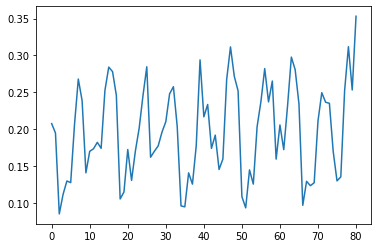

In [25]:
plt.plot(dist)
plt.show()

In [26]:
np.argmax(dist)

80

In [27]:
#make a find peaks algorithm, that finds all peaks above a threshold
def find_peaks(data, threshold):
    peaks = []
    for i in range(len(data)-1):
        if data[i] > threshold:
            if data[i] > data[i-1] and data[i] > data[i+1]:
                peaks.append(i)
    return peaks

def compute_threshold(data):
    return np.mean(data) + 2*np.std(data)

#make a function called mark_valid that checks if the current peak is less than 5 frames away from the next peak
def mark_valid(peaks, dist):
    valid = []
    for i in range(len(peaks)-1):
        if peaks[i+1] - peaks[i] < dist:
            valid.append([peaks[i], peaks[i+1]])
    return valid

thresh = compute_threshold(dist)
peaks = find_peaks(dist, thresh)
valid = mark_valid(peaks, 5)
valid

[]

In [28]:
#make a function that given a dataframe and list of pairs replaces the points between the pairs with the linear interpolation of the points
def remove_points(df, valid):
    for pair in valid:
        df.iloc[pair[0]:pair[1]+1] = np.nan
        
    #set the right and left touch columns to the correct values of the uninterpolated data
    df['right_touch'] = df['right_touch'].fillna(df['right_touch'].bfill())
    df['left_touch'] = df['left_touch'].fillna(df['left_touch'].bfill())
    
    df = df.interpolate()
    
    return df

df_new = remove_points(df, valid)
dist_new = []
for i in range(len(df_new)-1):
    dist_new.append(np.linalg.norm(df_new[leg_cols].iloc[i] - df_new[leg_cols].iloc[i+1]))


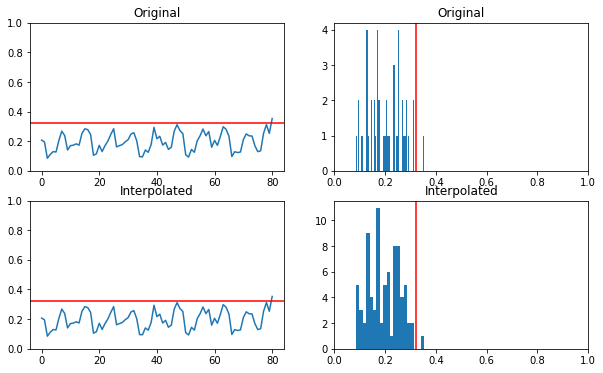

In [29]:
fig, ax = plt.subplots(2, 2)

ax[0, 0].plot(dist)
ax[0, 0].set_ylim([0, 1])
ax[0, 0].set_title('Original')
ax[0, 0].axhline(y=thresh, color='r', linestyle='-')

ax[1, 0].plot(dist_new)
ax[1, 0].set_ylim([0, 1])
ax[1, 0].set_title('Interpolated')
ax[1, 0].axhline(y=thresh, color='r', linestyle='-')

ax[0, 1].hist(dist, bins=100)
ax[0, 1].set_xlim([0, 1])
ax[0, 1].set_title('Original')
ax[0, 1].axvline(x=thresh, color='r', linestyle='-')

ax[1, 1].hist(dist_new, bins=20)
ax[1, 1].set_xlim([0, 1])
ax[1, 1].set_title('Interpolated')
ax[1, 1].axvline(x=thresh, color='r', linestyle='-')


fig.set_figheight(6)
fig.set_figwidth(10)
plt.show()

In [30]:
#save the new dataframe to a csv file
df_new.to_csv(f'leg_fix/{file}.csv', index=False)